Histograms of all variables


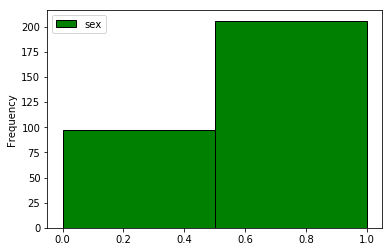

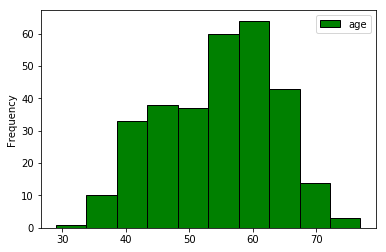

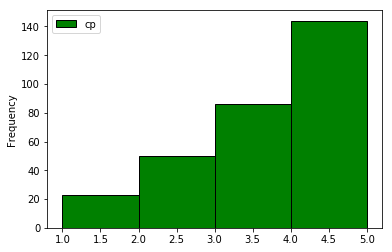

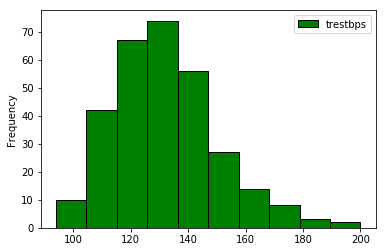

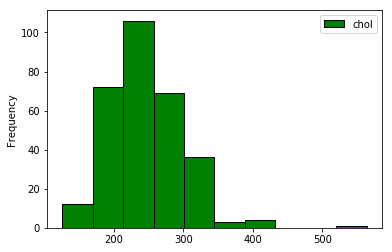

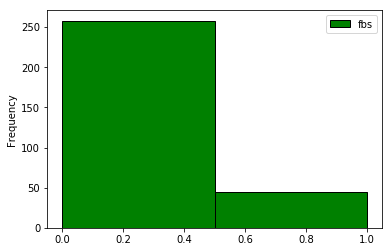

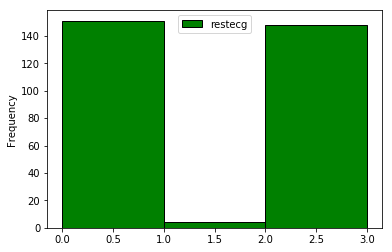

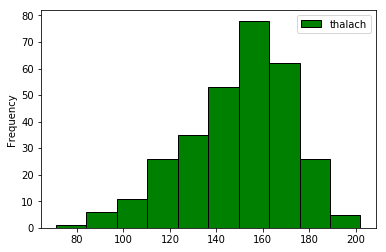

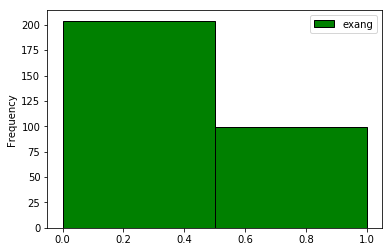

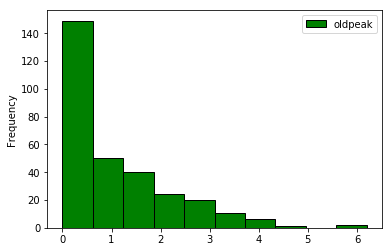

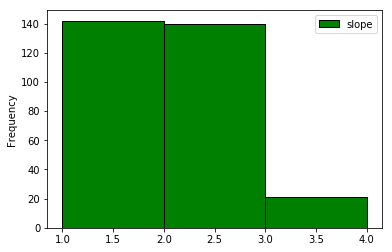

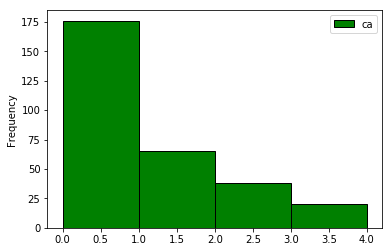

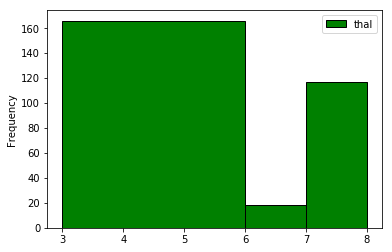

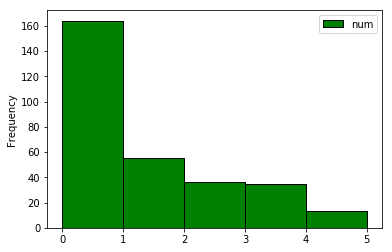

In [26]:
import os
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

path = 'c:\\Users\\tjame\\Downloads\\'
os.chdir(path)

##distributions of each variable
heartData = pd.read_csv("heart_data.CSV",na_values=" NaN")

print('Histograms of all variables')
heartData.plot(y='sex', kind = 'hist', color = 'green', edgecolor = 'black',bins = 2)
heartData.plot(y='age', kind = 'hist', color = 'green', edgecolor = 'black',bins = 10)
heartData.plot(y='cp', kind = 'hist', color = 'green', edgecolor = 'black',bins =(1,2,3,4,5))
heartData.plot(y='trestbps', kind = 'hist', color = 'green', edgecolor = 'black',bins = 10)
heartData.plot(y='chol', kind = 'hist', color = 'green', edgecolor = 'black',bins = 10)
heartData.plot(y='fbs', kind = 'hist', color = 'green', edgecolor = 'black',bins = 2)
heartData.plot(y='restecg', kind = 'hist', color = 'green', edgecolor = 'black',bins = (0,1,2,3))
heartData.plot(y='thalach', kind = 'hist', color = 'green', edgecolor = 'black',bins = 10)
heartData.plot(y='exang', kind = 'hist', color = 'green', edgecolor = 'black',bins = 2)
heartData.plot(y='oldpeak', kind = 'hist', color = 'green', edgecolor = 'black',bins = 10)
heartData.plot(y='slope', kind = 'hist', color = 'green', edgecolor = 'black',bins = (1,2,3,4))
heartData.plot(y='ca', kind = 'hist', color = 'green', edgecolor = 'black',bins = (0,1,2,3,4))
heartData.plot(y='thal', kind = 'hist', color = 'green', edgecolor = 'black',bins = (3,6,7,8))
heartData.plot(y='num', kind = 'hist', color = 'green', edgecolor = 'black',bins = (0,1,2,3,4,5))


How num varies with age, chol, trestbps, and thalach: 


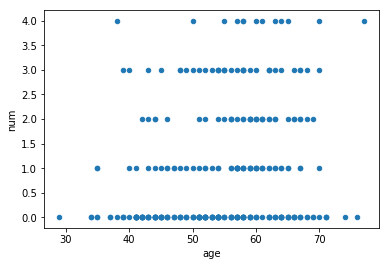

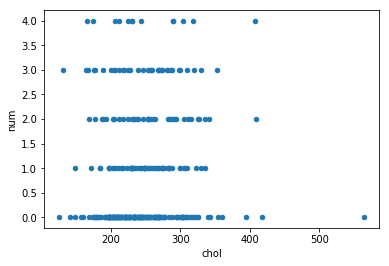

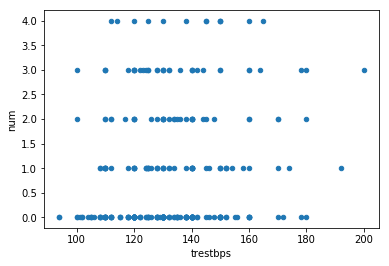

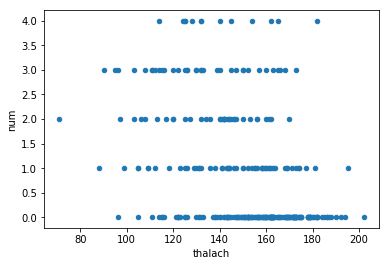

In [25]:
##how 'num' (heart disease) varies with age, chol, trestbps, and thalach
#scatter plots
print('How num varies with age, chol, trestbps, and thalach: ')
heartData.plot(x='age', y='num', kind='scatter')
heartData.plot(x='chol', y='num', kind='scatter')
heartData.plot(x='trestbps', y='num', kind='scatter')
heartData.plot(x='thalach', y='num', kind='scatter')


In [20]:
##classification 
from sklearn.preprocessing import MinMaxScaler

feature_names = ['age', 'chol','trestbps','thalach']

#copy of heart data to turn 'num' into binary values (0=no heart disease, 1=there is heart disease)
heartData2 = heartData.copy()
for id,nm in enumerate(heartData2['num']):
    if nm > 0:
        heartData2['num'][id] = 1

X = heartData[feature_names]
Y = heartData2['num']

#building training and testing sets for classifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Support Vector Machine classifier
svm = SVC(gamma = 'auto')
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))

# After testing with other classifier models such as logistic regression, decision tree, K-nearest neighbors,
# and linear discriminant analysis, I found the Gaussian Naive Bayes classifier to produce the
# most accurate results

gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
preds = gnb.predict(X_test)
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'.format(accuracy_score(y_test, preds)))

C:\Users\tjame\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Accuracy of SVM classifier on training set: 0.71
Accuracy of SVM classifier on test set: 0.62
Accuracy of Gaussian Naive Bayes classifier on test set: 0.66
